In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
digit_mnist = keras.datasets.mnist
(x_train_full, y_train_full), (x_test, y_test) = digit_mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train_full.shape

(60000, 28, 28)

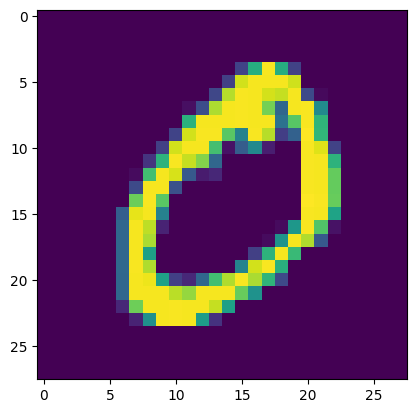

In [5]:
plt.imshow(x_train_full[1])

In [6]:
x_train_n=x_train_full/255
x_test_n=x_test/255

x_valid,x_train=x_train_n[:6000],x_train_n[6000:]
y_valid,y_train=y_train_full[:6000],y_train_full[6000:]
x_test=x_test_n

np.random.seed(42)
tf.random.set_seed(42)

In [7]:
# Model Building
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(200,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
             metrics=['accuracy'],
             optimizer = 'sgd')

In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.0702 - accuracy: 0.9785


[0.07016631960868835, 0.9785000085830688]

In [13]:
model_r = model.fit(x_train,y_train,epochs=60,
                         validation_data=(x_valid,y_valid))

Epoch 1/60
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0136 - accuracy: 0.9983 - val_loss: 0.0702 - val_accuracy: 0.9795
Epoch 2/60
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0128 - accuracy: 0.9985 - val_loss: 0.0728 - val_accuracy: 0.9793
Epoch 3/60
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0125 - accuracy: 0.9984 - val_loss: 0.0705 - val_accuracy: 0.9795
Epoch 4/60
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0118 - accuracy: 0.9986 - val_loss: 0.0707 - val_accuracy: 0.9800
Epoch 5/60
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0113 - accuracy: 0.9989 - val_loss: 0.0723 - val_accuracy: 0.9797
Epoch 6/60
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0109 - accuracy: 0.9987 - val_loss: 0.0698 - val_accuracy: 0.9805
Epoch 7/60
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0104 - accuracy: 0.9990 - val_loss: 0.0707 - val_accuracy:

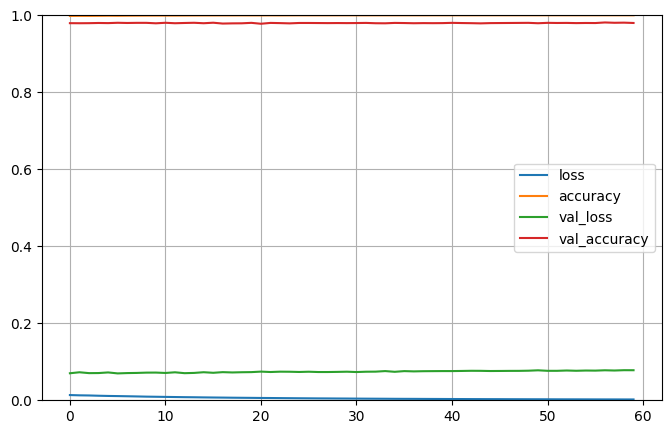

In [14]:
# Val-loss
pd.DataFrame(model_r.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
x_new=x_test[:5]
y_prob = model.predict(x_new)
y_prob.round(2)

1/1 [==============================] - 0s 107ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
predict_x = model.predict(x_new)
classes_x=np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 41ms/step


In [18]:
classes_x

array([7, 2, 1, 0, 4])